In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**EDA**

In [ ]:

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Preview the data
print(customers.head())
print(products.head())
print(transactions.head())

# Basic statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())



  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
           ProductID\tProductName\tCategory\tPrice
0         P001\tActiveWear Biography\tBooks\t169.3
1  P002\tActiveWear Smartwatch\tElectronics\t346.3
2      P003\tComfortLiving Biography\tBooks\t44.12
3           P004\tBookWorld Rug\tHome Decor\t95.69
4          P005\tTechPro T-Shirt\tClothing\t429.31
  TransactionID CustomerID ProductID   TransactionDate  Quantity  TotalValue  \
0        T00001      C0199      P067  25-08-2024 12:38         1      300.68   
1        T00112      C0146      P067  27-05-2024 22:23         1      300.68   
2        T00166      C0127      P067  25-04-2024 07:38         1      300.68   
3        T0027

Perform EDA

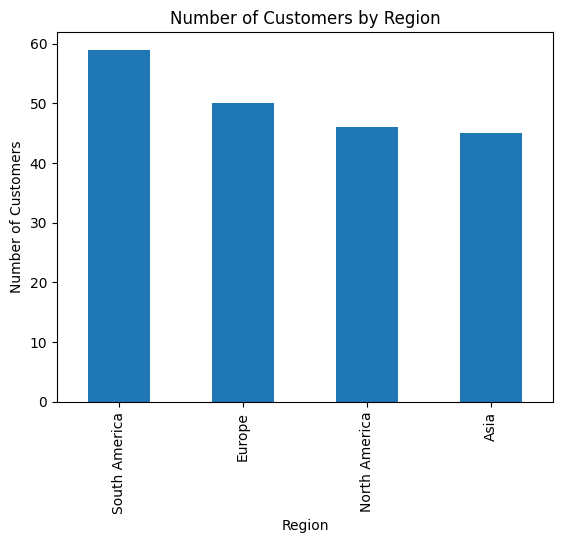

In [ ]:
# Plot the distribution of customers by region
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title='Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

Task 2: Lookalike **Model**

In [ ]:
print(customers.columns)
print(products.columns)



Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Index(['ProductID\tProductName\tCategory\tPrice'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load datasets
transactions = pd.read_csv("Transactions.csv")
customers = pd.read_csv("Customers.csv")

# Merge datasets to create the `data` DataFrame
data = transactions.merge(customers, on="CustomerID")

# Create the pivot table
pivot_table = data.pivot_table(index="CustomerID", columns="ProductID", values="Quantity", fill_value=0)

# Calculate similarity between customers
similarity_matrix = cosine_similarity(pivot_table)
similarity_df = pd.DataFrame(similarity_matrix, index=pivot_table.index, columns=pivot_table.index)

# Define a function to get the top 3 similar customers
def get_top_3_similar(customer_id):
    similar_scores = similarity_df[customer_id].sort_values(ascending=False)
    top_customers = similar_scores.iloc[1:4]
    return list(top_customers.index), list(top_customers.values)

# Example usage: Get top 3 similar customers for "C0001"
customer_id = "C0001"
top_customers, scores = get_top_3_similar(customer_id)

print(f"Top 3 similar customers for {customer_id}:")
for cust, score in zip(top_customers, scores):
    print(f"Customer ID: {cust}, Similarity Score: {score:.2f}")


Top 3 similar customers for C0001:
Customer ID: C0097, Similarity Score: 0.55
Customer ID: C0194, Similarity Score: 0.47
Customer ID: C0199, Similarity Score: 0.44


Task 3: Customer Segmentation (Clustering)
**bold text**

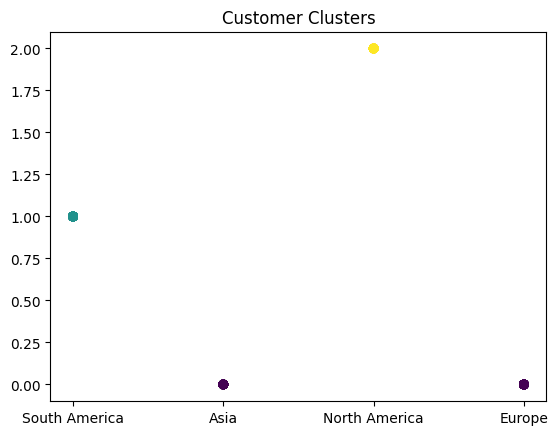

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare data for clustering
features = customers[["Region"]]
features_encoded = pd.get_dummies(features)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
customers['Cluster'] = kmeans.fit_predict(features_encoded)

# Visualize clusters
plt.scatter(customers['Region'], customers['Cluster'], c=customers['Cluster'], cmap='viridis')
plt.title("Customer Clusters")
plt.show()
